In [1]:
import numpy as np
import pandas as pd


In [ ]:
import requests
import pandas as pd

# API key and country
api_key = ""

country = "us"  

def fetch_real_news(api_key, country='us', page_size=50):
    url = f'https://newsapi.org/v2/top-headlines?country={country}&pageSize={page_size}&apiKey={api_key}'
    
    try:
        response = requests.get(url) #resquest
        
        if response.status_code == 200: # response
            data = response.json()

            # Check if 'status' is 'ok'
            if data['status'] == 'ok':
                headlines = [article['title'] for article in data['articles']]
                df_real = pd.DataFrame({'text': headlines, 'class': 1})  # 1 = Real
                print(f"Collected {len(df_real)} real news articles.")
                return df_real
            else:
                print(f"API returned an error: {data.get('message', 'Unknown error')}")
                return pd.DataFrame()
        else:
            print(f"Failed to fetch real news. Status code: {response.status_code}")
            return pd.DataFrame()
    
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()

# Fetch the news data
real_news_df = fetch_real_news(api_key, country)
if not real_news_df.empty:
    real_news_df.to_csv("real_news_data.csv", index=False)  # Save to CSV for later use
else:
    print("No real news collected.")


Collected 34 real news articles.


In [3]:
# fetch_fake_news.py

import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

def fetch_fake_news():
    try:
        service = Service("chromedriver.exe")
        options = Options()
        options.add_argument("--headless")  # optional: run browser in background
        driver = webdriver.Chrome(service=service, options=options)

        
        driver.get("https://www.snopes.com/fact-check/")
        time.sleep(5)  

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        driver.quit()

        articles = soup.find_all('div', class_='article_wrapper')
        fake_news_titles = []

        for article in articles:
            title_tag = article.find("h3", class_="article_title")
            if title_tag:
                fake_news_titles.append(title_tag.text.strip())

        df_fake_news = pd.DataFrame({'text': fake_news_titles, 'class': 0})  # 0 = Fake

        print(f"Collected {len(df_fake_news)} fake news articles.")
        return df_fake_news

    except Exception as e:
        print(f" Error occurred while fetching fake news: {e}")
        return pd.DataFrame()


if __name__ == "__main__":
    df = fetch_fake_news()
    print(df.head())
    df.to_csv("fake_news_data.csv", index=False)


Collected 20 fake news articles.
                                                text  class
0  Stockholm officials refused to comply with US ...      0
1  Lana Del Rey and Lindsay Lohan modeled for Abe...      0
2  Bill Clinton didn't receive $17M helicopter fr...      0
3  Don't fall for video of woman saying she wishe...      0
4  Real photo of phoenix-shaped lava flow from Si...      0


In [4]:
data_csv = pd.read_csv('updated_news.csv')  
print(data_csv.columns)


Index(['text', 'class'], dtype='object')


In [5]:
data_csv.shape

(45573, 2)

In [6]:
data_csv

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
45568,Obama didn't accept $22.9M donation from Venez...,0
45569,Unwrapping claims Trump provided 'mobile McDon...,0
45570,"Yes, RFK Jr. took grandkids swimming in sewage...",0
45571,Hit the brakes on rumor Schumer accepted Rolls...,0


In [7]:
#data_csv = data_csv.drop(["title", "subject","date"], axis = 1)

In [8]:
data_real=pd.read_csv("real_news_data.csv")
data_fake=pd.read_csv("fake_news_data.csv")

In [9]:
data_real.head()

,text,class
0,Scarlett Johansson Sings “Piano Man” Parody Wi...,1
1,Scottie Scheffler bulldozes Quail Hollow to gr...,1
2,Ukraine Is Making More Weapons Than Ever—but S...,1
3,FDA approves Novavax COVID-19 shot but with un...,1
4,Mexican Navy ship crashes into New York City's...,1


In [10]:
data_fake.head()

,text,class
0,Stockholm officials refused to comply with US ...,0
1,Lana Del Rey and Lindsay Lohan modeled for Abe...,0
2,Bill Clinton didn't receive $17M helicopter fr...,0
3,Don't fall for video of woman saying she wishe...,0
4,Real photo of phoenix-shaped lava flow from Si...,0


In [11]:
data_csv.tail()

,text,class
45568,Obama didn't accept $22.9M donation from Venez...,0
45569,Unwrapping claims Trump provided 'mobile McDon...,0
45570,"Yes, RFK Jr. took grandkids swimming in sewage...",0
45571,Hit the brakes on rumor Schumer accepted Rolls...,0
45572,Bill Clinton didn't receive $17M helicopter fr...,0


In [12]:
data_csv.columns,data_real.columns,data_fake.columns

(Index(['text', 'class'], dtype='object'),
 Index(['text', 'class'], dtype='object'),
 Index(['text', 'class'], dtype='object'))

In [13]:
data = pd.concat([data_csv, data_real, data_fake], ignore_index=True)
#data_fresh=pd.concat([data_real,data_fake])


In [14]:
data


,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
45622,Watch out for rumor Amazon announced it's leav...,0
45623,Pope Leo XIV didn't say Trump's immigration po...,0
45624,Pope Leo XIV never encouraged people to 'be woke',0
45625,Fake CNN graphic of India and Pakistan 'confli...,0


In [15]:
data.to_csv("updated_news.csv",index=False)
data.shape

(45627, 2)

In [16]:
#data_fresh.shape
#data_fresh

In [17]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [18]:
data

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
45622,Watch out for rumor Amazon announced it's leav...,0
45623,Pope Leo XIV didn't say Trump's immigration po...,0
45624,Pope Leo XIV never encouraged people to 'be woke',0
45625,Fake CNN graphic of India and Pakistan 'confli...,0


In [19]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

In [20]:
data_csv.shape,data.shape

((45573, 2), (45627, 2))

<Axes: xlabel='class', ylabel='count'>

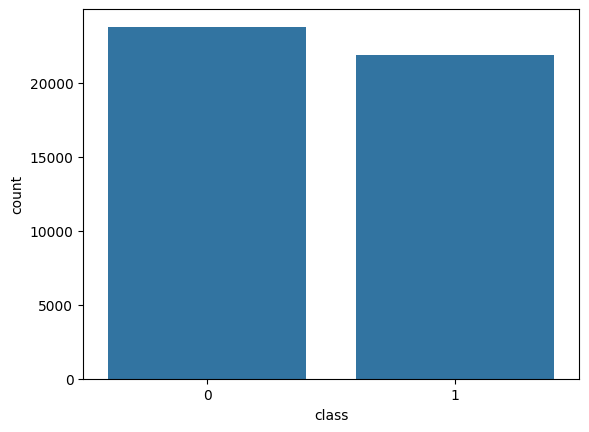

In [21]:
import seaborn as sns
sns.countplot(data=data,
			x='class',
			order=data['class'].value_counts().index)

In [22]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
import pandas as pd
import re
from nltk.corpus import stopwords
from tqdm import tqdm

stop_words = set(stopwords.words('english')) 

def clean_sentence(sentence):
    sentence = re.sub(r'[^\w\s]', '', sentence)            # Remove punctuation
    return ' '.join(
        token.lower() for token in sentence.split()
        if token.lower() not in stop_words
    )

# Apply with progress bar
tqdm.pandas()  # enables tqdm with apply
data['text'] = data['text'].progress_apply(clean_sentence)


100%|██████████| 45627/45627 [00:13<00:00, 3451.81it/s]


In [24]:
data

,text,class
0,washington reuters us republican congressional...,1
1,mocking liberal snowflake never good ideacnn s...,0
2,reuters wind gusts near hurricane force occurr...,1
3,washington reuters president donald trumps nom...,1
4,jared yates sexton professor creative writing ...,0
...,...,...
45622,new yorkwashington reuters several us chief ex...,1
45623,woman jail cell sitting around laughing openin...,0
45624,brussels reuters british eu negotiators talked...,1
45625,washington reuters us house speaker paul ryan ...,1


In [25]:
#data_fresh

In [26]:
"""preprocessed_review_fresh = preprocess_text(data_fresh['text'].values)
data_fresh['text'] = preprocessed_review_fresh"""

"preprocessed_review_fresh = preprocess_text(data_fresh['text'].values)\ndata_fresh['text'] = preprocessed_review_fresh"

In [27]:
#data = pd.concat([data_fresh, data], ignore_index=True)
data

,text,class
0,washington reuters us republican congressional...,1
1,mocking liberal snowflake never good ideacnn s...,0
2,reuters wind gusts near hurricane force occurr...,1
3,washington reuters president donald trumps nom...,1
4,jared yates sexton professor creative writing ...,0
...,...,...
45622,new yorkwashington reuters several us chief ex...,1
45623,woman jail cell sitting around laughing openin...,0
45624,brussels reuters british eu negotiators talked...,1
45625,washington reuters us house speaker paul ryan ...,1


In [28]:
""""preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review
data.to_csv("updated_news.csv")"""

'"preprocessed_review = preprocess_text(data[\'text\'].values)\ndata[\'text\'] = preprocessed_review\ndata.to_csv("updated_news.csv")'

In [29]:
data.shape

(45627, 2)

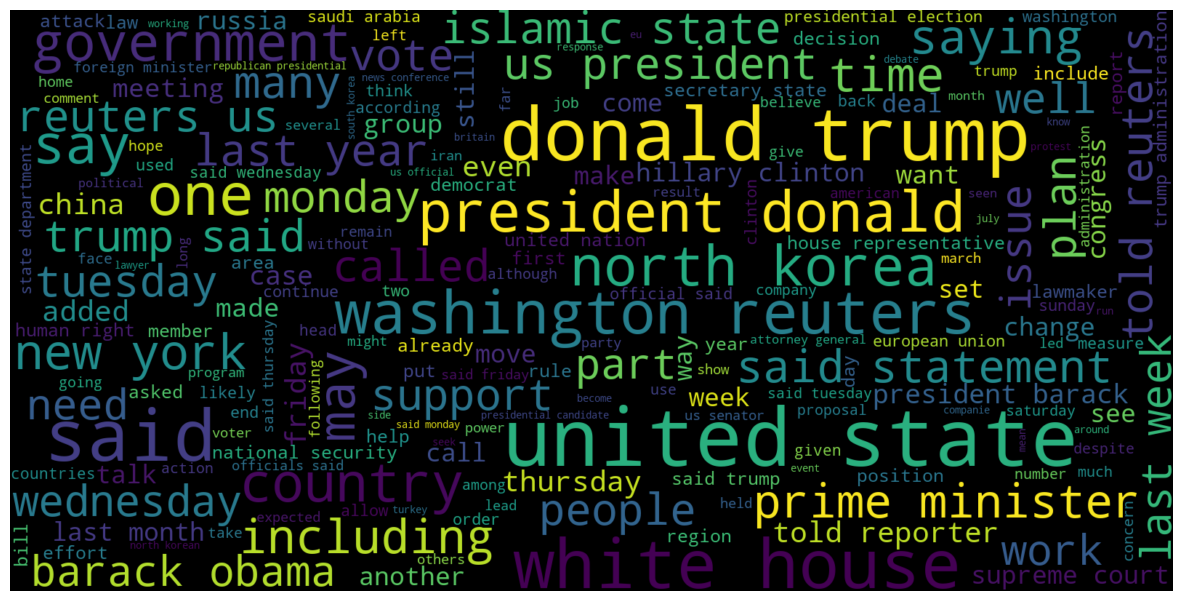

In [30]:
# Real
import matplotlib.pyplot as plt
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=True)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

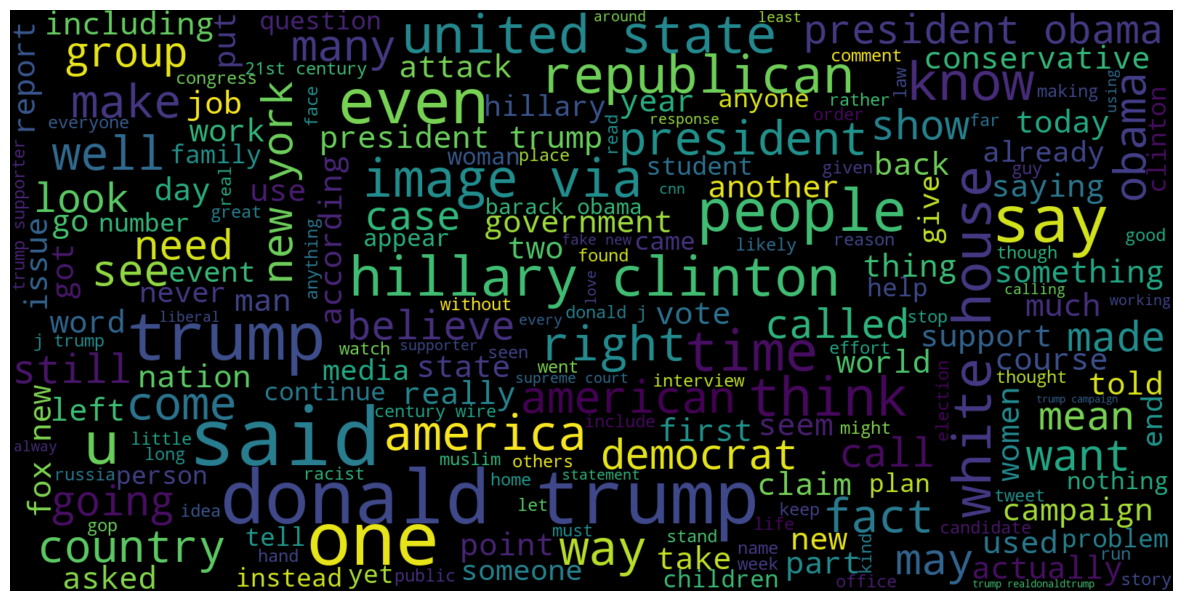

In [31]:
# Fake
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=True)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

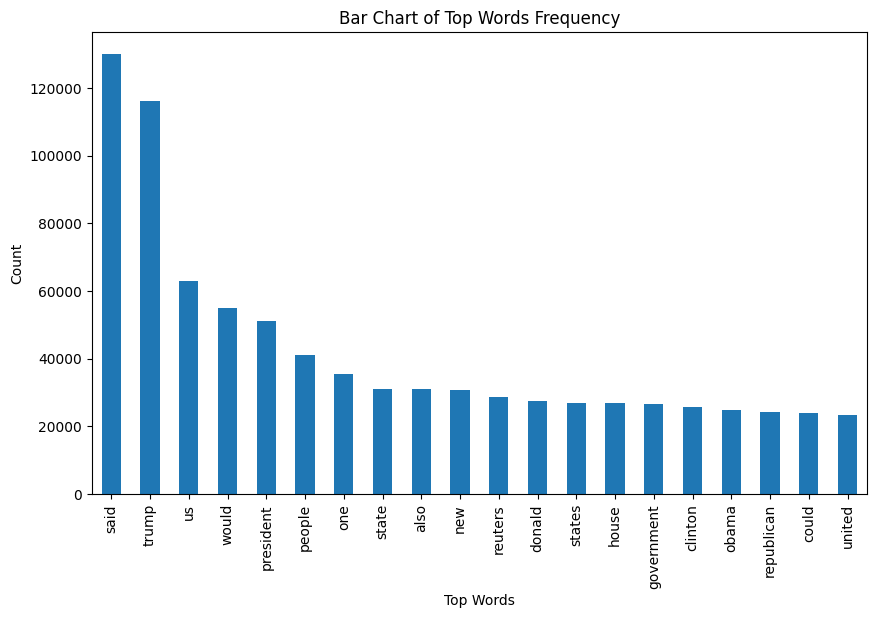

In [32]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
	vec = CountVectorizer().fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)
	return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
													data['class'],
													test_size=0.25)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(max_features= 5000)
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


In [35]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model_logistic.predict(x_train)))
print(accuracy_score(y_test, model_logistic.predict(x_test)))

0.985125657510228
0.982554571754186


In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.999853886616014
0.9893048128342246


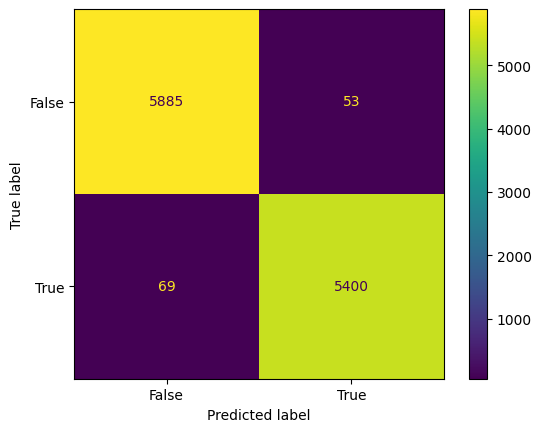

In [37]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [38]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump((vectorization, model), file)


In [39]:
model_logistic
with open('model_logistic.pkl', 'wb') as file:
    pickle.dump((vectorization, model_logistic),file)
